In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
from astropy.table import Table

In [2]:
import copy
t = Table.read('Tgas200_Wright2003_2MASS_FinCat_out.vot', format='votable')
print(t.colnames)


Source = t["Source"]
Gmag = t["X.Gmag."]
Vmag = t["VTmag"]
Jmag = t["Jmag"]
Hmag = t["Hmag"]
Kmag = t["Kmag"]
Qfl = t["Qfl"]
Bmag = t['BTmag']





['col1', 'angDist', 'd_arcsec', 'X_RAJ2000', 'X_DEJ2000', 'HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', 'X.FG.', 'e_.FG.', 'X.Gmag.', 'Var', 'X_RAJ2000.1', 'X_DEJ2000.1', 'TYC1', 'TYC2.1', 'TYC3', 'RAJ2000', 'DEJ2000', 'VTmag', 'BTmag', 'r_SpType', 'Dist', 'Teff', 'SpType', 'X2MASS', 'RAJ2000.1', 'DEJ2000.1', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag', 'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X', 'MeasureJD']


      DEJ2000      
-------------------
 76.565866999999997
 21.356347849999999
-41.970171669999999
 54.559615669999999
-4.6549535000000004
-42.425992290000003
 36.913656670000002
        21.28248597
 8.4062341299999996
-43.442619720000003
 39.790591429999999
 36.986167899999998
-43.356679849999999
       -20.92520747
       -15.82017211
 40.253230619999997
 51.307377840000001
 21.312478559999999
 7.8947624599999999
       -44.01447323


In [3]:
for i in range(0,len(Qfl)):
    if(Source.mask[i] == False):
        if(Qfl[i][0] == ord("A")):
            Jmag.mask[i] = False
        else:
            Jmag.mask[i] = True
        if(Qfl[i][1] == ord("A")):
            Hmag.mask[i] = False
        else:
            Hmag.mask[i] = True
        if(Qfl[i][2] == ord("A")):
            Kmag.mask[i] = False
        else:
            Kmag.mask[i] = True
print(len(Jmag))
print(len(Jmag.compressed()))

50093
48250


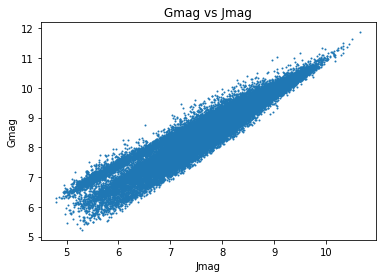

In [4]:
plt.title("Gmag vs Jmag")
plt.scatter(Jmag,Gmag,s=1.0)
plt.xlabel("Jmag")
plt.ylabel("Gmag")
plt.show()

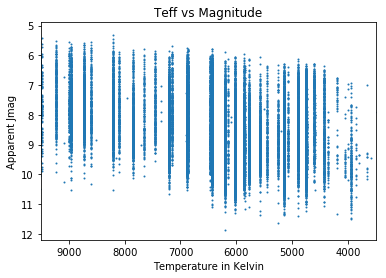

In [5]:
Teff = t["Teff"]
plt.title("Teff vs Magnitude")
plt.scatter(Teff,Gmag,s=1.0)
plt.xlabel("Temperature in Kelvin")
plt.ylabel("Apparent Jmag")
plt.xlim(3500,9500)

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

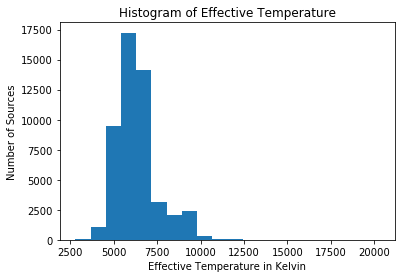

50093


In [6]:
temps = [2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000,10500]
test = []
#for i in range(0,len(Teff)):
#    if(Teff[i] >= 5000 & Teff[i] <= 5500):
#        test.append(Teff[i])
#        print(test[i])

bins = 20
plt.xlabel("Effective Temperature in Kelvin")
plt.ylabel("Number of Sources")
plt.title("Histogram of Effective Temperature")
pltemp=plt.hist(Teff,bins)
plt.show()
print(len(Teff))

In [4]:
SpType = t['SpType']
Sp = [0.0]*len(SpType)
SpV = []
SPIII = []
temperature = t['Teff']
for i in range(0,len(SpType)):
    if(SpType.mask[i]==False):
        Spc = SpType[i].decode()
        if(len(Spc) > 2):
            for c in range(0,len(Spc)):
                if(Spc[c] == 'V'):
                    Sp[i] = Sp[i] + 5
                if(Sp[c] == 'I'):
                    Sp[i] = Sp[i] + 1
                if(Sp[c] == '+'):
                    Sp[i] = -30
        else:
            Sp[i] = 5.1
        
        if(Sp[i] == 6):
            Sp[i] = 4
        if(Sp[i] > 5.2):
            Sp[i] = -30
        if(Sp[i] == 11):
            Sp[i] = 4.5
        if(Sp[i] == 9):
            Sp[i] = 3.5
            
for i in range(0,len(Sp)):
    if(Sp[i] == 5.0):
        SpV.append(Sp[i])
    if(Sp[i] ==3 ):
        SpIII.append(Sp[i])
print(len(SpType))        
print(len(Sp))
print(len(SpV))
print(SpV[0:30])

50093
50093
22514
[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]


In [55]:
SpType = t["SpType"]
SpTypeN = [0.0]*len(SpType)
for i in range(0,len(SpType)):
    if(SpType.mask[i] == False):
        SpT = SpType[i].decode()
        if(len(SpT) > 2):
            for j in range(0,len(SpT)):
                if(SpT[j] == 'I'):
                    SpTypeN[i] = SpTypeN[i] + 1
                if(SpT[j] == 'V'):
                    SpTypeN[i] = SpTypeN[i] + 5
                if(SpT[j] == '+'):
                    SpTypeN[i] = -20.
                
        else:
            SpTypeN[i] = 5.1
        
        if(SpTypeN[i] == 6):
            SpTypeN[i] = 4.
        if(SpTypeN[i] == 11):
            SpTypeN[i] = 4.5
        if(SpTypeN[i] == 9):
            SpTypeN[i] = 3.5
        if(SpTypeN[i] > 5.2):
            SpTypeN[i] = -30.
print("Finished Luminosity Class Translation")
count = 0
for i in range(0,len(SpType)):
    if(SpTypeN[i] < 0.):
        count = count + 1
test = SpType.compressed()
good = len(test) - count
print("  Number of single Stars: ",good,"  Binaries or Unknown luminosity class: ",count)

Finished Luminosity Class Translation
  Number of single Stars:  49670   Binaries or Unknown luminosity class:  423


In [58]:
count = 0
for j in range(len(Teff)):
    if(float(SpTypeN[j]) == 5.0):
        count = count + 1
print(count)

19960


In [26]:
para = t['Plx'] 
dist = 1000/para 
AbsGmag = [] 
AbsVmag = [] 
AbsKmag = [] 
AbsHmag = [] 
AbsJmag = [] 
AbsBmag = []

for i in range(len(dist)): 
    if(Kmag.mask[i] == False and Hmag.mask[i] == False and Jmag.mask[i] == False): 
        AbsGmag.append(Gmag[i] + 5 - 5*np.log10(dist[i]))

        AbsVmag.append(Vmag[i] + 5 - 5*np.log10(dist[i]))

        AbsKmag.append(Kmag[i] + 5 - 5*np.log10(dist[i]))

        AbsHmag.append(Hmag[i] + 5 - 5*np.log10(dist[i]))

        AbsJmag.append(Jmag[i] + 5 - 5*np.log10(dist[i]))

        AbsBmag.append(Bmag[i] + 5 - 5*np.log10(dist[i]))


[3.5043776035308838, 2.2642421722412109, 1.2373929023742676, 0.37450814247131348, 0.047734260559082031, 2.9840960502624512, 1.8383498191833496, 3.1845827102661133, 2.3590567111968994, 2.948868989944458, 1.7667338848114014, 2.5559618473052979, -0.49607706069946289, 3.6240905523300171, 0.74231839179992676, 3.3939220905303955, 1.6036251783370972, 2.5129621028900146, 2.419586181640625, 3.9125221967697144]


In [5]:
para = t['Plx'] 
dist = 1000/para 
AbsGmag = [] 
AbsVmag = [] 
AbsKmag = [] 
AbsHmag = [] 
AbsJmag = [] 
AbsBmag = []

for i in range(len(dist)): 
    
    AbsGmag.append(Gmag[i] + 5 - 5*np.log10(dist[i]))

    AbsVmag.append(Vmag[i] + 5 - 5*np.log10(dist[i]))

    AbsKmag.append(Kmag[i] + 5 - 5*np.log10(dist[i]))

    AbsHmag.append(Hmag[i] + 5 - 5*np.log10(dist[i]))

    AbsJmag.append(Jmag[i] + 5 - 5*np.log10(dist[i]))

    AbsBmag.append(Bmag[i] + 5 - 5*np.log10(dist[i]))
        
print(len(AbsVmag), len(AbsBmag), len(AbsJmag))

50093 50093 50093


In [47]:
print(Hmag[0:20])
print(AbsHmag[0:20])

   Hmag  
---------
8.4549999
8.5039997
7.4239998
6.0050001
5.5349998
8.7930002
8.2919998
8.4820004
    7.822
8.9350004
7.6170001
7.7919998
5.5279999
8.3780003
7.2129998
9.2250004
5.9860001
7.7490001
       --
8.5179996
[3.5043776035308838, 2.2642421722412109, 1.2373929023742676, 0.37450814247131348, 0.047734260559082031, 2.9840960502624512, 1.8383498191833496, 3.1845827102661133, 2.3590567111968994, 2.948868989944458, 1.7667338848114014, 2.5559618473052979, -0.49607706069946289, 3.6240905523300171, 0.74231839179992676, 3.3939220905303955, 1.6036251783370972, 2.5129621028900146, masked, 2.419586181640625]


In [18]:
GmagV = [] 
VmagV = [] 
KmagV = [] 
HmagV = [] 
JmagV = [] 
BmagV = []
TotalV = 0
for i in range(len(Sp)): 
    if('5.0' in str(Sp[i])): 
        GmagV.append(AbsGmag[i]) 
        VmagV.append(AbsVmag[i]) 
        KmagV.append(AbsKmag[i]) 
        HmagV.append(AbsHmag[i]) 
        JmagV.append(AbsJmag[i])
        BmagV.append(AbsBmag[i])
        TotalV = TotalV + 1
print('There are ', TotalV, 'Main Sequence stars')
#print(np.mean(VmagV))


IndexError: list index out of range

0


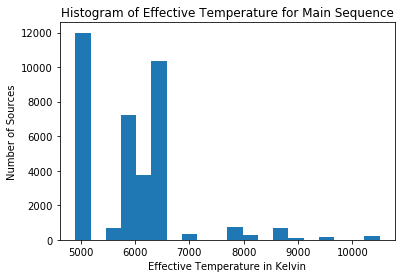

In [15]:
Temps= []
length = 0
for i in Teff:
    if(Sp[i] == 5.0):
        Temps.append(Teff[i])
        if(5000.0 <= Teff[i] <= 5500.0):
            length = length + 1
        
print(length)

bins = 20
plt.xlabel("Effective Temperature in Kelvin")
plt.ylabel("Number of Sources")
plt.title("Histogram of Effective Temperature for Main Sequence")
pltemp=plt.hist(Temps,bins)
plt.show()

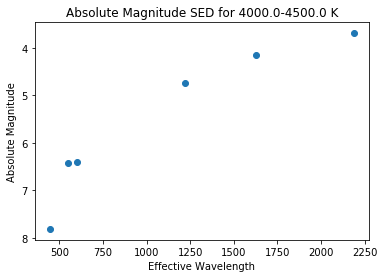

Number of Stars:  89
Average Effective Temp in K:  4268.20224719
Standard Deviation of Temp in K:  143.092347001
Min Temp:  4000   Max Temp:  4420
Average Bmag:  7.81854387482
Average Vmag:  6.41852138417
Average Gmag:  6.39347271176
average Hmag:  4.15441534305
average Jmag:  4.73198664953
average Kmag:  3.68231145683


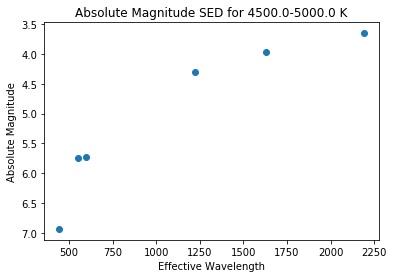

Number of Stars:  295
Average Effective Temp in K:  4781.52542373
Standard Deviation of Temp in K:  113.770711422
Min Temp:  4590   Max Temp:  4900
Average Bmag:  6.93296852071
Average Vmag:  5.74580578036
Average Gmag:  5.72921788155
average Hmag:  3.96114266333
average Jmag:  4.31055999071
average Kmag:  3.6524075704


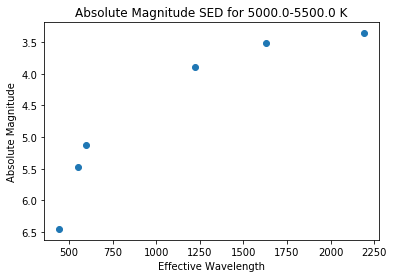

Number of Stars:  452
Average Effective Temp in K:  5191.28318584
Standard Deviation of Temp in K:  81.8002065283
Min Temp:  5080   Max Temp:  5450
Average Bmag:  6.45087101851
Average Vmag:  5.46896813085
Average Gmag:  5.12137712685
average Hmag:  3.51180501286
average Jmag:  3.8910384781
average Kmag:  3.35966343681


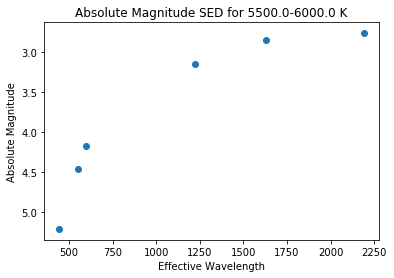

Number of Stars:  4522
Average Effective Temp in K:  5788.25077399
Standard Deviation of Temp in K:  96.304406006
Min Temp:  5570   Max Temp:  5860
Average Bmag:  5.21345569198
Average Vmag:  4.46059005427
Average Gmag:  4.1704984809
average Hmag:  2.84827705496
average Jmag:  3.15431689736
average Kmag:  2.76542513632


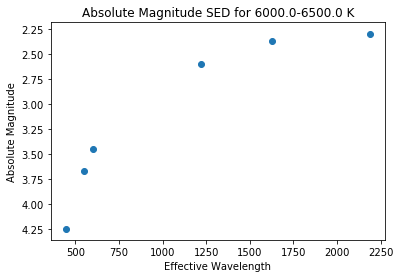

Number of Stars:  8401
Average Effective Temp in K:  6316.11474824
Standard Deviation of Temp in K:  174.840272774
Min Temp:  6030   Max Temp:  6470
Average Bmag:  4.24439282305
Average Vmag:  3.67201719751
Average Gmag:  3.44878250892
average Hmag:  2.36195519206
average Jmag:  2.59343853185
average Kmag:  2.29145582759


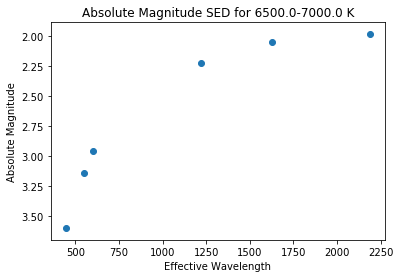

Number of Stars:  3059
Average Effective Temp in K:  6889.92808107
Standard Deviation of Temp in K:  1.19716591286
Min Temp:  6870   Max Temp:  6890
Average Bmag:  3.60029836027
Average Vmag:  3.13788515573
Average Gmag:  2.95877817037
average Hmag:  2.04334072409
average Jmag:  2.22244626976
average Kmag:  1.97989937444


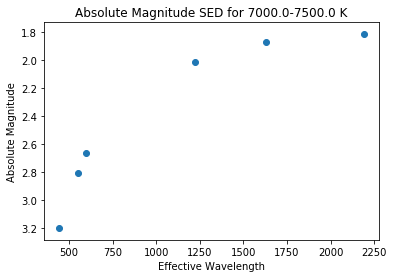

Number of Stars:  897
Average Effective Temp in K:  7201.1148272
Standard Deviation of Temp in K:  19.0019999182
Min Temp:  7150   Max Temp:  7450
Average Bmag:  3.19661974375
Average Vmag:  2.80447259343
Average Gmag:  2.66271700733
average Hmag:  1.87115028647
average Jmag:  2.0134031063
average Kmag:  1.81283925204


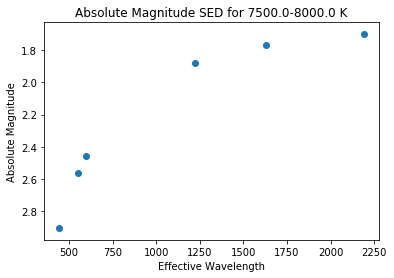

Number of Stars:  627
Average Effective Temp in K:  7847.76714514
Standard Deviation of Temp in K:  21.0139318558
Min Temp:  7650   Max Temp:  7850
Average Bmag:  2.90321667818
Average Vmag:  2.56397267525
Average Gmag:  2.4549068694
average Hmag:  1.76421041148
average Jmag:  1.87888585597
average Kmag:  1.70125353702


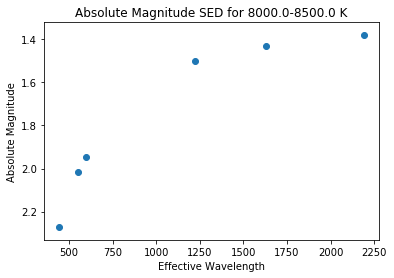

Number of Stars:  194
Average Effective Temp in K:  8194.32989691
Standard Deviation of Temp in K:  23.1270456435
Min Temp:  8100   Max Temp:  8200
Average Bmag:  2.27097523397
Average Vmag:  2.01516598094
Average Gmag:  1.94827858877
average Hmag:  1.43081657526
average Jmag:  1.50019477612
average Kmag:  1.38154226296


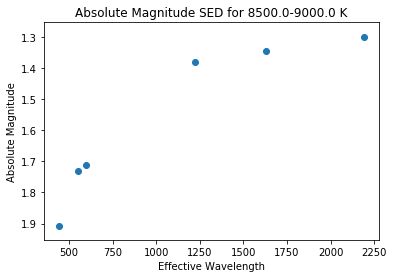

Number of Stars:  551
Average Effective Temp in K:  8819.50998185
Standard Deviation of Temp in K:  128.63775794
Min Temp:  8600   Max Temp:  9000
Average Bmag:  1.90671926748
Average Vmag:  1.72998605579
Average Gmag:  1.71127019391
average Hmag:  1.34670126982
average Jmag:  1.38126468702
average Kmag:  1.29926369924


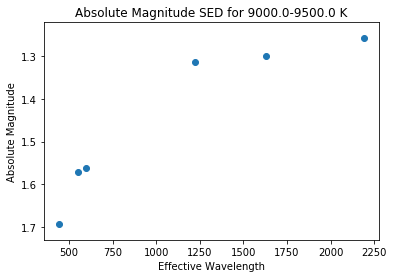

Number of Stars:  274
Average Effective Temp in K:  9224.19708029
Standard Deviation of Temp in K:  41.7007657015
Min Temp:  9000   Max Temp:  9480
Average Bmag:  1.69252163172
Average Vmag:  1.56994498777
Average Gmag:  1.56133738062
average Hmag:  1.29976253135
average Jmag:  1.31337765503
average Kmag:  1.25858195754


KeyboardInterrupt: 

In [59]:
Teff = t['Teff']
temps = [4000.0,4500.0,5000.0,5500.0,6000.0,6500.0,7000.0,7500.0,8000.0,8500.0,9000.0,9500.0,10000.0]
EffWave = [445,551,600,1220,1630,2190]

totalB = []
totalV = []
totalK = []
totalH = []
totalJ = []
totalG = []
totalTemp = []
TotalMags = np.zeros((6,13))
for i in temps:
    sources = 0
    tempRange = []
    GmagV = []
    VmagV = []
    KmagV = []
    HmagV = []
    JmagV = []
    BmagV = []
    for j in range(0,len(Teff)):
        if(SpTypeN[j] in SpV):
            if(i <= Teff[j] <= (i+500.0)):
                
                tempRange.append(Teff[j])
                if(Gmag.mask[j] == False): 
                    GmagV.append(AbsGmag[j])
                if(Vmag.mask[j] == False): 
                    VmagV.append(AbsVmag[j])
                if(Kmag.mask[j] == False):     
                    KmagV.append(AbsKmag[j])
                if(Hmag.mask[j] == False): 
                    HmagV.append(AbsHmag[j])
                if(Jmag.mask[j] == False): 
                    JmagV.append(AbsJmag[j])
                if(Bmag.mask[j] == False): 
                    BmagV.append(AbsBmag[j])
                sources = sources + 1
    MeanTemp = np.mean(tempRange)
    MinTemp = np.min(tempRange)
    MaxTemp = np.max(tempRange)
    TempStd = np.std(tempRange)     
    MeanGmag = np.mean(GmagV)
    MeanVmag = np.mean(VmagV)
    MeanHmag = np.mean(HmagV)
    MeanJmag = np.mean(JmagV)
    MeanKmag = np.mean(KmagV)
    MeanBmag = np.mean(BmagV)
    totalTemp.append(MeanTemp)
    totalB.append(MeanBmag)
    totalG.append(MeanGmag)
    totalV.append(MeanVmag)
    totalH.append(MeanHmag)
    totalK.append(MeanKmag)
    totalJ.append(MeanJmag)
    GmagStd = np.std(GmagV)
    HmagStd = np.std(HmagV)
    VmagStd = np.std(VmagV)
    JmagStd = np.std(JmagV)
    KmagStd = np.std(KmagV)
    BmagStd = np.std(BmagV)
    Mags = [MeanBmag,MeanVmag,MeanGmag,MeanJmag,MeanHmag,MeanKmag]
    #Mags = [MeanKmag,MeanHmag,MeanJmag,MeanGmag,MeanVmag]
    plt.xlabel('Effective Wavelength')
    plt.ylabel('Absolute Magnitude')
    plt.title('Absolute Magnitude SED for '+ str(i)+'-'+ str(i+500) + ' K')
    plt.scatter(EffWave,Mags)
    plt.gca().invert_yaxis()
    #plt.errorbar(EffWave,Mags,[BmagStd,VmagStd,GmagStd,JmagStd,HmagStd,KmagStd])
    plt.show()
    
    print('Number of Stars: ', sources)
    print('Average Effective Temp in K: ', MeanTemp)
    print('Standard Deviation of Temp in K: ', TempStd)
    print('Min Temp: ', MinTemp, '  Max Temp: ', MaxTemp)
    print('Average Bmag: ', MeanBmag)
    print('Average Vmag: ', MeanVmag)
    print('Average Gmag: ', MeanGmag)
    print('average Hmag: ', MeanHmag)
    print('average Jmag: ', MeanJmag)
    print('average Kmag: ', MeanKmag)
    #print('Standard Deviation of Gmag: ',GmagStd)
    #print(MeanVmag)
        

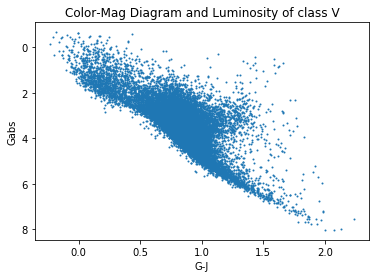

Mean Effective Temperature in G-J Range 0.0-0.5:  9214.22548121 
Number of Sources:  1091 

Mean Effective Temperature in G-J Range 0.5-1.2:  6526.54218534 
Number of Sources:  12291 

     G-J [0.0-0.5]                           G-J [0.5-1.2]

    RA                 DEC                 RA                DEC
271.16212372     -41.97017167          226.74873211     -43.69063699
74.65369743     -4.55926406          226.60395309     -43.38338727
47.30642525     -26.71566031          93.61467076     -28.64481718
93.2465281     -28.46361115          145.28740823     -15.19464007
48.75113318     -26.10046057          227.21422296     -43.0562281
166.07580511     38.86825208          271.73607166     -42.02175682
45.2229946     52.35204252          145.62106952     -14.98827436
273.55307709     -39.94978747          145.667118     -14.65855827
51.54522928     48.38403538          235.93745855     -9.31543579
52.22355732     49.07031609          270.45088421     -41.40514056
51.29177245     49.

In [60]:
RA = t['RAJ2000']
DEC = t['DEJ2000']
Gabs = []
GJabs = []
# First Region represents the G-J range of [0.0-0.5]
# Second Region represents the G-J range of [0.5-1.2]
# Each RA and DEC arrays correspond to each region based on the _"first" or _"second" notation
RA_first = []
DEC_first = []
temp_first = []
RA_second = []
DEC_second = []
temp_second = []
for i in range(0,len(Teff)):
    if(SpTypeN[i] == 5.0 and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False):
        if(Jmag.mask[i] == False and Gmag.mask[i] == False):
            Gvalue = AbsGmag[i]
            GJvalue = AbsGmag[i]-AbsJmag[i]
            Gabs.append(Gvalue)
            GJabs.append(GJvalue)
            if(GJvalue >= 0.0 and GJvalue < 0.5):
                if(Gvalue >= 0.0 and Gvalue <= 2.0):
                    RA_first.append(RA[i])
                    DEC_first.append(DEC[i])
                    temp_first.append(Teff[i])
            if(0.5 <= GJvalue <= 1.2):
                if(2.0 <= Gvalue <= 4.0):
                    RA_second.append(RA[i])
                    DEC_second.append(DEC[i])
                    temp_second.append(Teff[i])
plt.title('Color-Mag Diagram and Luminosity of class V')
plt.xlabel('G-J')
plt.ylabel('Gabs')
plt.gca().invert_yaxis()
plt.scatter(GJabs,Gabs,s=1.0)
plt.show()
meanTempFirst = np.mean(temp_first)
meanTempSecond = np.mean(temp_second)



print('Mean Effective Temperature in G-J Range 0.0-0.5: ', meanTempFirst, '\nNumber of Sources: ', len(RA_first), '\n')


print('Mean Effective Temperature in G-J Range 0.5-1.2: ', meanTempSecond, '\nNumber of Sources: ', len(RA_second), '\n')
print('     G-J [0.0-0.5]                           G-J [0.5-1.2]\n')
print('    RA                 DEC                 RA                DEC')
for j in range(0,20):
    
    print(RA_first[j], '   ',DEC_first[j], '        ',RA_second[j], '   ',DEC_second[j])



In [153]:
totalMags = np.array([totalB,totalV,totalG,totalJ,totalH,totalK])

#plt.scatter(totalMags[0][0:])
print(totalMags[:,12])
print(totalMags[:,12][2]-totalMags[:,12][5])

[ 1.13198906  1.08665074  1.09707195  0.92395071  0.93862775  0.89636776]
0.200704184789


In [133]:
array = [[1,2,3],[4,5,6]]
print(array[0:3][0:1])

[[1, 2, 3]]


In [155]:
Teff = t['Teff']
temps = [4000.0,4500.0,5000.0,5500.0,6000.0,6500.0,7000.0,7500.0,8000.0,8500.0,9000.0,9500.0,10000.0]
totalRelB = ([])
totalRelV = ([])
totalRelK = ([])
totalRelH = ([])
totalRelJ = ([])
totalRelG = ([])

for i in temps:
    sources = 0
    tempRange = []
    GmagV = []
    VmagV = []
    KmagV = []
    HmagV = []
    JmagV = []
    BmagV = []
    for j in range(0,len(Teff)):
        if(Sp[j] in SpV):
            if(i <= Teff[j] <= i+500):
                tempRange.append(Teff[j])
                if(Gmag.mask[j] == False):
                    GmagV.append(AbsGmag[j]-AbsGmag[j])
                if(Vmag.mask[j] == False and Gmag.mask[j] == False):
                    VmagV.append(AbsGmag[j]-AbsVmag[j])
                if(Kmag.mask[j] == False and Gmag.mask[j] == False):
                    KmagV.append(AbsGmag[j]-AbsKmag[j])
                if(Hmag.mask[j] == False and Gmag.mask[j] == False):
                    HmagV.append(AbsGmag[j]-AbsHmag[j])
                if(Jmag.mask[j] == False and Gmag.mask[j] == False):
                    JmagV.append(AbsGmag[j]-AbsJmag[j])
                if(Bmag.mask[j] == False and Gmag.mask[j] == False):
                    BmagV.append(AbsGmag[j]-AbsBmag[j])
                sources = sources + 1
    
    MeanGmag = np.mean(GmagV)
    MeanVmag = np.mean(VmagV)
    MeanHmag = np.mean(HmagV)
    MeanJmag = np.mean(JmagV)
    MeanKmag = np.mean(KmagV)
    MeanBmag = np.mean(BmagV)
    totalRelB.append(MeanBmag)
    totalRelG.append(MeanGmag)
    totalRelV.append(MeanVmag)
    totalRelH.append(MeanHmag)
    totalRelK.append(MeanKmag)
    totalRelJ.append(MeanJmag)
    print(MeanBmag)
    Mags = [MeanBmag,MeanVmag,MeanGmag,MeanJmag,MeanHmag,MeanKmag]
    #Mags = [MeanKmag,MeanHmag,MeanJmag,MeanGmag,MeanVmag]
    #plt.xlabel('Effective Wavelength')
#     plt.ylabel('Absolute Magnitude')
#     plt.title('Relative Magnitude SED for '+ str(i)+'-'+ str(i+500) + ' K')
#     plt.scatter(EffWave,Mags)
#     plt.gca().invert_yaxis()
#     plt.show()
    

-2.02892228762
-1.51704221946
-1.27442063608
-1.04360393481
-0.796222378793
-0.639458481791
-0.520390145752
-0.448883538336
-0.336956648827
-0.21628846965
-0.160472211212
-0.0842311961113
-0.0344747365123


/astromake/opt/python/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


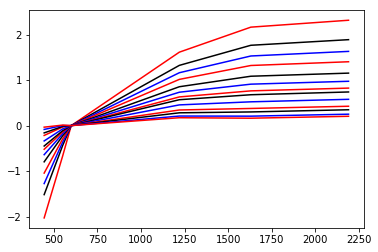

In [180]:
from matplotlib.pyplot import *

totalRelMags = np.array([totalRelB,totalRelV,totalRelG,totalRelJ,totalRelH,totalRelK])
fig, ax = plt.subplots()
ax.set_color_cycle(['red', 'black', 'blue'])
#plt.scatter(totalMags[0][0:])
for i in range(len(temps)):
    plt.plot(EffWave,totalRelMags[:,i])
    #plt.legend(["Mean Temp: "], [totalTemp[i]])
    
plt.show()


/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Warning: converting a masked element to nan.
  """Entry point for launching an IPython kernel.
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:2766: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


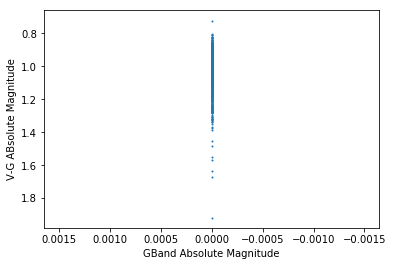

6
nan


In [52]:
VmG = np.array(JmagV) - np.array(GmagV)
plt.xlabel('GBand Absolute Magnitude')
plt.ylabel('V-G ABsolute Magnitude')
plt.scatter(GmagV,VmG,s=1.0)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.show()

print(len(Mags))
print((MeanGmag))

In [49]:
print(GmagV[0:5])

[1.4566256999969482, 1.4566256999969482, 1.4566256999969482, 1.4566256999969482, 1.4566256999969482]


In [11]:
# This cell contains old code. I do not want to erase it until I am 100% sure I do not require it. Once final SED
# models are complete, I will remove it
Teff = t['Teff']
Plx = t["Plx"]

temp = np.linspace(3500,10000,num=14)
print(temp)
#18 sets of ranges
tempRange = []
PlxRange = []
JmagRange = []
GmagRange = []
HmagRange = []
KmagRange = []
VmagRange = []
dist = []
Sp_str = str(Sp)

def AbsoluteMag(mag,dist):
    return mag - (5*np.log10(dist/10))

for low in temp:
    high = low + 500
    for i in range(0,len(Teff)):
        if(low <= Teff[i] <= high):
            if(Teff.mask[i] == False):
                tempRange.append(Teff[i])
                JmagRange.append(Jmag[i])
                GmagRange.append(Gmag[i])
                HmagRange.append(Hmag[i])
                KmagRange.append(Kmag[i])
                VmagRange.append(Vmag[i])
                PlxRange.append(Plx[i])
                dist.append(1000/Plx[i])
    #plt.hist(tempRange,bins=25)
    #TempValMask = ma.masked_outside(temp,low,high)
    #TempValComp = TempValMask.compressed()
    #plt.hist(TempValComp,bins=15)
    #plt.show()    
    for j in range(0,len(tempRange)):
        JmagRange[j] = AbsoluteMag(JmagRange[j],dist[j])
        GmagRange[j] = AbsoluteMag(GmagRange[j],dist[j])
        HmagRange[j] = AbsoluteMag(HmagRange[j],dist[j])
        KmagRange[j] = AbsoluteMag(KmagRange[j],dist[j])
        VmagRange[j] = AbsoluteMag(VmagRange[j],dist[j])
    print("There are ", len(tempRange), " stars in the range", low, " - ", high)
    print("\n","Mean: ", np.mean(tempRange))
    print("Standard Deviation: ", np.std(tempRange))
    print("Max: ", np.max(tempRange))
    print("Min: ", np.min(tempRange))
    print("\n")
    print("Standard Deviation for Absolute Jmag", np.std(JmagRange))
    #print("There are ", len(TempValComp), "in the range", low, " - ", high)
    #tempRange = []

[  3500.   4000.   4500.   5000.   5500.   6000.   6500.   7000.   7500.
   8000.   8500.   9000.   9500.  10000.]
There are  275  stars in the range 3500.0  -  4000.0

 Mean:  3920.14545455
Standard Deviation:  93.6180670562
Max:  4000
Min:  3530


Standard Deviation for Absolute Jmag 

C:\Users\Kevin.Hall\Anaconda3\lib\site-packages\numpy\ma\core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


nan
There are  1131  stars in the range 4000.0  -  4500.0

 Mean:  4259.34571176
Standard Deviation:  219.736430467
Max:  4420
Min:  3530


Standard Deviation for Absolute Jmag nan
There are  6223  stars in the range 4500.0  -  5000.0

 Mean:  4673.33440463
Standard Deviation:  231.626417363
Max:  4900
Min:  3530


Standard Deviation for Absolute Jmag nan
There are  10828  stars in the range 5000.0  -  5500.0

 Mean:  4883.65903214
Standard Deviation:  304.259629527
Max:  5500
Min:  3530


Standard Deviation for Absolute Jmag nan
There are  15768  stars in the range 5500.0  -  6000.0

 Mean:  5168.48236936
Standard Deviation:  494.176794431
Max:  5860
Min:  3530


Standard Deviation for Absolute Jmag nan
There are  36728  stars in the range 6000.0  -  6500.0

 Mean:  5786.07166195
Standard Deviation:  639.840071778
Max:  6470
Min:  3530


Standard Deviation for Absolute Jmag nan
There are  41701  stars in the range 6500.0  -  7000.0

 Mean:  5917.38951104
Standard Deviation:  698.52497

In [45]:
test = 0
for i in range(0,len(Teff)):
    if(str(SpV) in str(Sp[i])):
        if(5000.0 <= Teff[i] <= 5500.0):
            test = test + 1
        
print(test)
      

KeyboardInterrupt: 